### 1. 성능개선 개괄
- overfitting 문제
- 데이터 불균형 무제
  (고려 방법)
- 하이퍼 파라미터를 통한 모델 성능 개선
- 데이터 불균형(Imbalanced Data) 해결을 위한 resampling
- 교차검증(Cross Validation, CV)를 통한 데이터 강건성 확인

#### 1-1 하이퍼 파라미터( Hyperparameter ) : 
- 모델이 학습하면서 최적의 값을 자동으로 찾는 것이 아니라 사용자가 직접 지정해 주어야 하는 변수
- 하이퍼파라미터는 모델 학습 과정에서 사용자가 직접 설정해야 하는 값들로, 모델의 성능에 큰 영향을 미친다. 
-(예시) Learning Rate, Epochs,트리의 깊이(depth) , Hidden Units,Regularization Strength,
Weight Initialization, Mini-batch Size
- 파라미터(Parameter) : 컴퓨터가 가중치나 편향처럼 모델이 학습을 통해 최적의 값을 찾는 변수
-  예를 들어, 하이퍼파라미터는 모델이 최적의 성능을 낼 수 있도록 실험을 통해 조정해야 하며, 일반적으로 교차 검증(cross-validation)이나 그리드 서치(grid search) 등의 방법을 통해 최적값을 찾습니다.

#### 1-2 불균형 데이터 (Imbalanced Data)
- 정상 범주(정상기업)의 관측치 수와 이상 범주의 관측치(부실기업) 수가 현저히 차이나는 데이터 상태
- 이로 인한 문제점 발생 

### 1-3 교차검증(Cross Validation, CV)
- ML/DL 모델링 과정에서 모델이 overfitting(과적합)이 되는 현상을 방지하기 위해 사용하는 기법
- 데이터를 여러 부분으로 나누고, 각 부분을 훈련과 테스트 용도로 번갈아 사용하여 모델을 평가하는 방법
- Training data과 Validation data을 여러번 나눈 뒤 모델의 학습을 검증하는 방식

### 2. 데이터 준비하기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings 
warnings.filterwarnings('ignore')

# 통계 라이브러리리
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

In [2]:
# 필요한 라이브러리 불러오기
# Scikit-learn의 성능 평가 지표(metrics) 모듈에서 필요한 함수들을 가져옵니다. 
# 모델의 성능을 평가하기 위해 분류 보고서, 정확도, 혼동 행렬을 계산하는 데 사용
# classification_report: 분류 모델의 성능을 종합적으로 평가합니다.
# 정밀도(Precision), 재현율(Recall), F1 점수, 그리고 각 클래스별 지원(Support) 정보를 제공합니다.

# confusion_matrix용도:혼동 행렬(Confusion Matrix)을 생성합니다.
# 혼동 행렬은 예측 결과와 실제 결과를 매트릭스 형태로 나타냅니다.
# 각 위치는 특정 클래스에 대해 참/거짓의 예측 개수를 나타냅니다:
# TP (True Positive): 실제 1, 예측 1.
# FP (False Positive): 실제 0, 예측 1.
# FN (False Negative): 실제 1, 예측 0.
# TN (True Negative): 실제 0, 예측 0.

from sklearn.metrics import classification_report, accuracy_score # 성능평가 라이브러리리
from sklearn.metrics import confusion_matrix # 오차행렬 데이터

In [3]:
# 최종 선택된 피처 데이터 불러오기
df_train = pd.read_csv("./4. train_data.csv")
df_test = pd.read_csv("./4. test_data.csv")

In [4]:
# 훈련 데이터에서 'label' 컬럼을 제외하여 독립 변수 X_train을 생성
x_train = df_train.drop('label', axis=1)  # 'label' 열을 제외한 나머지 특성들
y_train = df_train["label"]  # 'label' 열을 종속 변수로 설정

# 테스트 데이터에서 'label' 컬럼을 제외하여 독립 변수 X_test를 생성
x_test = df_test.drop('label', axis=1)  # 'label' 열을 제외한 나머지 특성들
y_test = df_test["label"]  # 'label' 열을 종속 변수로 설정


In [5]:
# 데이터 스케일링을 위한 StandardScaler 객체 생성
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 훈련 데이터에 대해 fit 메서드를 사용하여 평균과 표준편차 계산
scaler.fit(x_train)  # x_train 데이터를 기반으로 스케일링 파라미터 계산

# 훈련 데이터와 테스트 데이터를 각각 스케일링 적용
x_train_std = scaler.transform(x_train)  # 훈련 데이터를 스케일링
x_test_std = scaler.transform(x_test)    # 테스트 데이터를 스케일링

# 스케일링된 데이터를 pandas DataFrame 형태로 변환하여 컬럼명 유지
x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns)  # 스케일링된 훈련 데이터를 DataFrame으로 변환
x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)    # 스케일링된 테스트 데이터를 DataFrame으로 변환


### 3. 하이퍼 파라미터

#### 3-1 로지스틱 회귀

- 하이퍼 파라미터 설명
1. penalty: 정규화 유형 (l1, l2).
2. C: 규제 강도. 낮을수록 규제가 강해짐.
3. solver: 최적화 알고리즘. l1은 liblinear나 saga와 호환.
4. max_iter: 반복 횟수.

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 하이퍼파라미터 후보군 설정
# param_grid : 여러 하이퍼파라미터의 조합을 지정

# 하이퍼파라미터 설명
# penalty:규제 유형(Regularization Type)을 지정합니다.
# 'l1': L1 정규화 (특정 계수를 0으로 만들어 특성 선택에 유리).
# 'l2': L2 정규화 (모든 계수를 작게 유지, 과적합 방지).
# C:규제 강도를 설정하는 하이퍼파라미터입니다.
# 값이 작을수록 강한 규제가 적용되어 모델이 단순화됩니다.
# 예: 0.01 → 강한 규제, 100 → 약한 규제.
# solver:최적화 알고리즘을 지정합니다.
# 'liblinear': 소규모 데이터셋에 적합하며, L1 및 L2 정규화를 지원합니다.
# 'saga': 대규모 데이터셋에 적합하며, L1, L2, ElasticNet 규제를 지원합니다.
# max_iter:최적화 알고리즘의 최대 반복 횟수를 설정합니다.
# 기본값은 100이며, 더 복잡한 데이터에 대해 값을 늘려야 할 수도 있습니다.

param_grid = {
    'penalty': ['l1', 'l2'],           # 규제 유형
    'C': [0.01, 0.1, 1, 10, 100],     # 규제 강도
    'solver': ['liblinear', 'saga'],  # 최적화 알고리즘
    'max_iter': [100, 500, 1000]      # 최대 반복 횟수
}

# 로지스틱 회귀 모델 생성
# random_state=42 :랜덤성(Randomness)**을 제어하기 위한 하이퍼파라미터입니다.
# 로지스틱 회귀 모델 학습 과정에서 초기 조건(특히 가중치 초기화)이나 데이터 분할에 랜덤성이 포함될 수 있습니다.
# random_state**를 고정하면, 동일한 데이터와 설정으로 실행할 때 항상 같은 결과를 얻을 수 있습니다.
# 42는 임의의 숫자

# logreg : logreg는 로지스틱 회귀 모델 객체입니다. 이 객체를 통해 모델 학습, 예측, 평가 등의 작업을 수행할 수 있습니다.

logreg = LogisticRegression(random_state=42)

# GridSearchCV 생성
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',  # 평가 지표 (필요에 따라 변경 가능)
    cv=5,                # 교차 검증 folds 개수
    verbose=1,           # 진행 상황 출력
    n_jobs=-1            # 병렬 처리 사용 (-1은 모든 CPU 사용)
)

# 학습 및 최적의 하이퍼파라미터 탐색
grid_search.fit(x_train_std, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred_logreg = best_model.predict(x_test_std)

# 성능 평가
print(f'Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}')
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9469
Logistic Regression Test Accuracy: 0.9503
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3107
           1       0.20      0.03      0.05       150

    accuracy                           0.95      3257
   macro avg       0.58      0.51      0.51      3257
weighted avg       0.92      0.95      0.93      3257



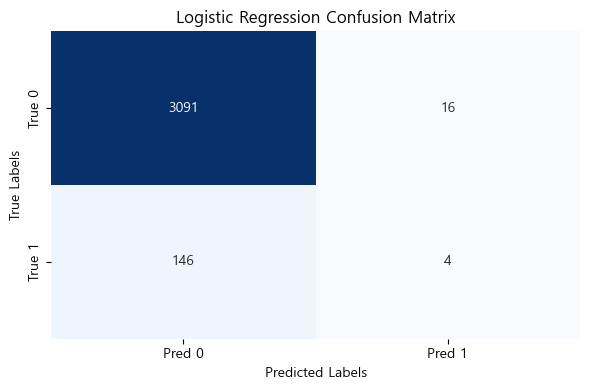

In [7]:
# Confusion Matrix 계산
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

#### 3-2 DT

- 하이퍼 파라미터 설명
1. criterion: 분할 품질 기준.
    - gini: Gini 불순도.
    - entropy: 정보 이득.
    - log_loss: 로그 손실(확률 기반).
2. max_depth: 트리의 최대 깊이. 깊이가 너무 깊으면 과적합 가능성.
3. min_samples_split: 노드를 분할하는 데 필요한 최소 샘플 수.
4. min_samples_leaf: 리프 노드에 필요한 최소 샘플 수.
5. max_features: 각 분할에서 고려할 최대 특징 수.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 하이퍼파라미터 후보군 설정
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # 분할 기준
    'max_depth': [None, 10, 20, 30, 40],          # 최대 깊이
    'min_samples_split': [2, 5, 10],              # 내부 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],                # 리프 노드에 있어야 할 최소 샘플 수
    'max_features': [None, 'sqrt', 'log2'],       # 고려할 최대 특징 수
}

# 모델 생성
dt_model = DecisionTreeClassifier(random_state=42)

# GridSearchCV 생성
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',  # 평가 지표
    cv=5,                # 교차 검증 fold 개수
    verbose=1,           # 진행 상황 출력
    n_jobs=-1            # 병렬 처리 사용
)

# 학습 및 최적의 하이퍼파라미터 탐색
grid_search.fit(x_train_std, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_std)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9402
Accuracy: 0.9364
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3107
           1       0.13      0.07      0.09       150

    accuracy                           0.94      3257
   macro avg       0.54      0.52      0.53      3257
weighted avg       0.92      0.94      0.93      3257



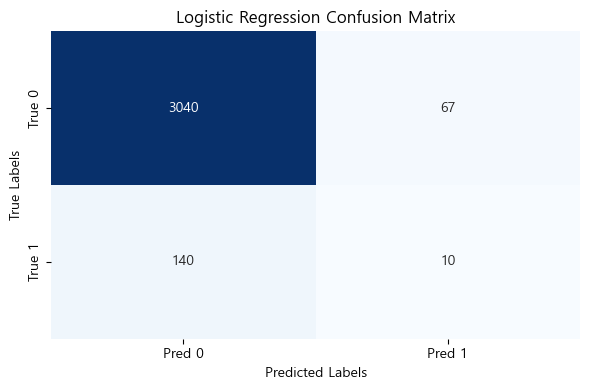

In [9]:
# Confusion Matrix 계산
cm_dt = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

#### 3-3 랜덤포레스트

- 하이퍼 파라미터 설명(주의 : 시간이 오래걸릴 수 있음)
1. n_estimators: 랜덤 포레스트의 트리 개수를 설정합니다. 트리 개수가 많을수록 모델이 복잡해지며 과적합의 위험이 있지만, 보통 성능이 향상됩니다.
2. max_depth: 트리의 깊이를 제한하여 과적합을 방지할 수 있습니다.
3. min_samples_split: 내부 노드를 분할하기 위한 최소 샘플 수로, 트리의 깊이가 깊어지는 것을 방지하는 데 유용합니다.
4. min_samples_leaf: 리프 노드의 최소 샘플 수로, 리프 노드가 너무 적은 샘플만 가지도록 방지합니다.
5. max_features: 각 분할에서 고려할 최대 특징 수를 지정하여 모델의 복잡도를 조절할 수 있습니다.
6. bootstrap: True일 경우 데이터의 부트스트랩 샘플을 사용하여 트리를 생성합니다. False일 경우 전체 데이터를 사용합니다.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 하이퍼파라미터 후보군 설정
param_grid = {
    'n_estimators': [50, 100],        # 트리 개수
    'max_depth': [None, 10, 20],        # 트리 최대 깊이
    'min_samples_split': [2, 5],        # 분할을 위한 최소 샘플 수
    'min_samples_leaf': [1, 2],          # 리프 노드의 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],  # 각 분할에서 고려할 최대 특징 수
    'bootstrap': [True, False],             # 부트스트랩 여부
}

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV 생성
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',  # 평가 지표
    cv=5,                # 교차 검증 fold 개수
    verbose=1,           # 진행 상황 출력
    n_jobs=-1            # 병렬 처리 사용
)

# 학습 및 최적의 하이퍼파라미터 탐색
grid_search.fit(x_train_std, y_train)

# 최적의 하이퍼파라미터와 점수 출력
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 최적의 모델로 예측
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(x_test_std)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy:.4f}')
print('Classification Report for Random Forest:')
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9452
Random Forest Accuracy: 0.9481
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3107
           1       0.12      0.02      0.03       150

    accuracy                           0.95      3257
   macro avg       0.54      0.51      0.50      3257
weighted avg       0.92      0.95      0.93      3257



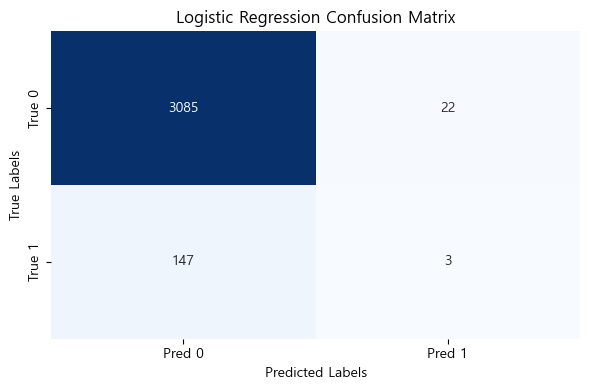

In [12]:
# Confusion Matrix 계산
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

#### 3-4 XG Boost

- 하이퍼 파라미터 설명
1. n_estimators: 트리의 개수를 설정합니다. 트리 수가 많을수록 모델의 성능이 향상될 수 있지만, 과적합의 위험도 커질 수 있습니다.
2. learning_rate: 각 트리가 모델에 미치는 영향을 조정하는 파라미터로, 값이 작을수록 더 많은 트리가 필요합니다.
3. max_depth: 트리의 깊이를 제한하여 과적합을 방지할 수 있습니다.
4. min_child_weight: 트리를 분할하기 위해 필요한 최소 샘플 가중치입니다. 이 값을 증가시키면 과적합을 방지할 수 있습니다.
5. subsample: 각 트리 학습에 사용할 샘플의 비율을 설정합니다. 과적합을 방지하려면 1.0보다 작은 값을 사용할 수 있습니다.
6. colsample_bytree: 각 트리에서 사용할 특징의 비율로, 이 값을 1.0으로 설정하면 모든 특징을 사용하고, 더 작은 값을 설정하면 더 적은 특징만 사용할 수 있습니다.
7. gamma: 트리를 분할할 때 최소 손실 감소량을 설정합니다. 이 값을 증가시키면 트리 분할을 덜 자주 하게 됩니다.
8. scale_pos_weight: 불균형 클래스 문제에서 클래스 가중치를 조정하는 파라미터입니다.

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 하이퍼파라미터 후보군 설정
param_grid = {
    'n_estimators': [50, 100],  # 트리 개수
    'learning_rate': [0.01, 0.1],  # 학습률
    'max_depth': [3, 6],  # 트리 최대 깊이
    'min_child_weight': [1, 5],  # 최소 자식 노드 샘플 가중치
    'subsample': [0.7, 0.8],  # 데이터 샘플 비율
    'colsample_bytree': [0.7, 0.8],  # 특징 샘플 비율
    'gamma': [0, 0.1],  # 손실 감소
    'scale_pos_weight': [1, 10]  # 불균형 클래스 가중치
}

# GridSearchCV 생성
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # 평가 지표
    cv=5,  # 교차 검증 fold 개수
    verbose=1,  # 진행 상황 출력
    n_jobs=-1  # 병렬 처리 사용
)

# 학습 및 최적의 하이퍼파라미터 탐색
grid_search.fit(x_train_std, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 최적의 모델로 예측
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(x_test_std)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print('Classification Report for XGBoost:')
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'scale_pos_weight': 1, 'subsample': 0.7}
Best Cross-Validation Accuracy: 0.9469
XGBoost Accuracy: 0.9539
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3107
           1       0.00      0.00      0.00       150

    accuracy                           0.95      3257
   macro avg       0.48      0.50      0.49      3257
weighted avg       0.91      0.95      0.93      3257



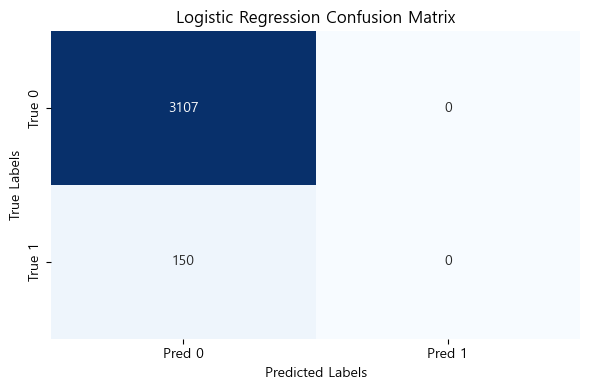

In [14]:
# Confusion Matrix 계산
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

### 4. resampling

- 데이터를 재구성하여 모델의 성능을 개선하거나 불균형 문제를 해결하는 기술로 주로 머신러닝에서 클래스 불균형 문제를 다룰 때 사용
- SMOTH over sampling으로 진행
- train의 0과 1의 데이터 일치

SMOTE의 주요 개념
- 기존 소수 클래스 데이터를 복제하지 않고, 새로운 데이터를 생성하여 데이터의 다양성을 유지한다.
- 새로운 데이터를 생성하기 위해 소수 클래스 샘플 간의 선형 보간법(interpolation)을 사용한다.
- KNN 방법 활용

#### 4-1 데이터 준비하기

In [15]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings 
warnings.filterwarnings('ignore')

# 통계 라이브러리리
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

In [16]:
# imbalanced-learn 라이브러리에서 SMOTE(Synthetic Minority Over-sampling Technique) 기법을 불러오기
from imblearn.over_sampling import SMOTE                 

# 데이터에서 각 항목의 개수를 계산할 수 있는 함수불러오기
from collections import Counter  

In [17]:
# 최종 선택된 피처 데이터 불러오기
df_train = pd.read_csv("./data/4. train_data.csv")
df_test = pd.read_csv("./data/4. test_data.csv")

In [18]:
# 훈련 데이터에서 'label' 컬럼을 제외하여 독립 변수 X_train을 생성
x_train = df_train.drop('label', axis=1)  # 'label' 열을 제외한 나머지 특성들
y_train = df_train["label"]  # 'label' 열을 종속 변수로 설정

# 테스트 데이터에서 'label' 컬럼을 제외하여 독립 변수 X_test를 생성
x_test = df_test.drop('label', axis=1)  # 'label' 열을 제외한 나머지 특성들
y_test = df_test["label"]  # 'label' 열을 종속 변수로 설정


In [19]:
# SMOTE(Synthetic Minority Over-sampling Technique)를 사용
x_train, y_train = SMOTE(random_state=4).fit_resample(x_train, y_train)

# 재샘플링 후 x_train의 형태를 출력하여 샘플 수 확인
print(x_train.shape)

# y_train의 각 클래스별 샘플 개수를 확인
y_train.value_counts()


(13934, 5)


label
0    6967
1    6967
Name: count, dtype: int64

In [20]:
# 데이터 스케일링을 위한 StandardScaler 객체 생성
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 훈련 데이터에 대해 fit 메서드를 사용하여 평균과 표준편차 계산
scaler.fit(x_train)  # x_train 데이터를 기반으로 스케일링 파라미터 계산

# 훈련 데이터와 테스트 데이터를 각각 스케일링 적용
x_train_std = scaler.transform(x_train)  # 훈련 데이터를 스케일링
x_test_std = scaler.transform(x_test)    # 테스트 데이터를 스케일링

# 스케일링된 데이터를 pandas DataFrame 형태로 변환하여 컬럼명 유지
x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns)  # 스케일링된 훈련 데이터를 DataFrame으로 변환
x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)    # 스케일링된 테스트 데이터를 DataFrame으로 변환


In [21]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score # 성능평가 라이브러리리
from sklearn.metrics import confusion_matrix # 오차행렬 데이터

# 시각화 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

#### 4-2 로지스틱회귀

In [22]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성

logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# 모델 학습
logreg_model.fit(x_train_std, y_train)

# 예측
y_pred_logreg = logreg_model.predict(x_test_std)

# 성능 평가
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}')
print('Classification Report for Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.7706
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3107
           1       0.09      0.45      0.15       150

    accuracy                           0.77      3257
   macro avg       0.53      0.62      0.51      3257
weighted avg       0.93      0.77      0.83      3257



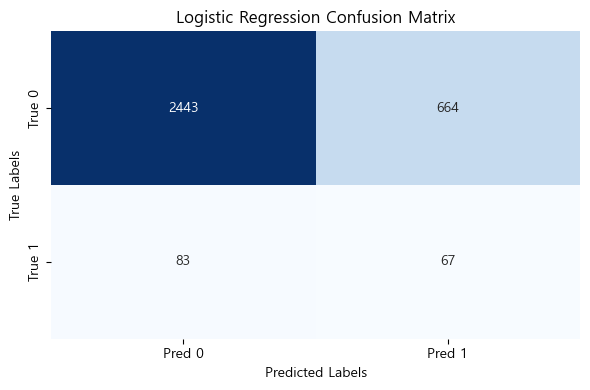

In [23]:
# Confusion Matrix 계산
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

#### 4-3 DT

In [24]:
# 디시전트리 라이브러리 불러오기기
from sklearn.tree import DecisionTreeClassifier 

# Decision Tree 모델 생성
model = DecisionTreeClassifier(random_state=42)

# 모델 학습
model.fit(x_train_std, y_train)

# 예측
y_pred = model.predict(x_test_std)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7550
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3107
           1       0.06      0.27      0.09       150

    accuracy                           0.75      3257
   macro avg       0.51      0.53      0.48      3257
weighted avg       0.92      0.75      0.82      3257



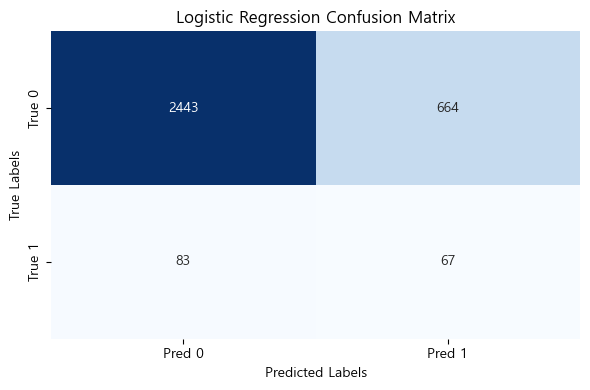

In [25]:
# Confusion Matrix 계산
cm_rf = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

#### 4-4 랜덤포레스트

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 디폴트값진행

# 모델 학습
rf_model.fit(x_train_std, y_train)

# 예측
y_pred_rf = rf_model.predict(x_test_std)

# 성능 평가
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print('Classification Report for Random Forest:')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8060
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3107
           1       0.07      0.27      0.11       150

    accuracy                           0.81      3257
   macro avg       0.52      0.55      0.50      3257
weighted avg       0.92      0.81      0.86      3257



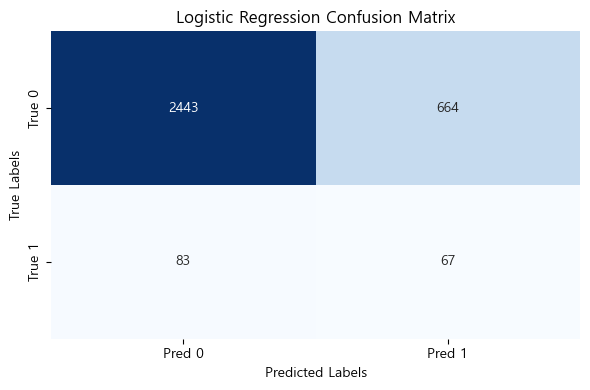

In [27]:
# Confusion Matrix 계산
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

#### 4-5 XG Boost

In [28]:
import xgboost as xgb

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 모델 학습
xgb_model.fit(x_train_std, y_train)

# 예측
y_pred_xgb = xgb_model.predict(x_test_std)

# 성능 평가
print(f'XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}')
print('Classification Report for XGBoost:')
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8020
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3107
           1       0.08      0.31      0.12       150

    accuracy                           0.80      3257
   macro avg       0.52      0.57      0.51      3257
weighted avg       0.92      0.80      0.85      3257



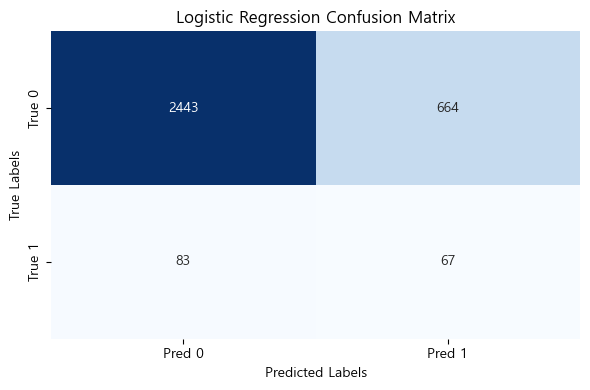

In [29]:
# Confusion Matrix 계산
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 4))  # 시각화의 크기를 설정
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
# annot=True: 각 셀에 숫자 값을 표시
# xticklabels, yticklabels: x축과 y축의 레이블을 설정 (예측 값, 실제 값)

# 제목, 레이블 설정
plt.title('Logistic Regression Confusion Matrix')  # 제목 설정
plt.xlabel('Predicted Labels')  # x축 레이블 설정
plt.ylabel('True Labels')  # y축 레이블 설정

plt.tight_layout()  # 레이아웃을 자동으로 조정하여 요소들이 겹치지 않도록 설정
plt.show()  # 시각화 결과 출력

### 5. CV(Cross-Validation, 교차 검증)

- 머신러닝 모델의 성능을 평가하고 일반화 능력을 테스트하기 위한 기법
- 데이터를 여러 번 나누어 훈련하고 테스트하면서 모델의 성능을 평가하는 방법
- train data와 test데이터를 합해서 5개로 랜덤해서 진행
- 성능은 5개의 평균으로 평가

In [30]:
import pandas as pd
# 최종 선택된 피처 데이터 불러오기
df_train = pd.read_csv("./4. train_data.csv")
df_test = pd.read_csv("./4. test_data.csv")

#### 5-1 로지스틱 회귀

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


# train과 test 데이터를 합치기
df = pd.concat([df_train, df_test], axis=0)

# 피처와 레이블 나누기
X = df.drop(columns=['label'])  # 'label' 열은 타겟 변수라고 가정
y = df['label']

# KFold 교차검증 설정 (shuffle=True로 랜덤하게 섞기)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 성능 평가를 위한 리스트 초기화
accuracies = []

# 교차검증 수행
for train_index, test_index in kf.split(X):
    # 훈련 세트와 테스트 세트 나누기
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 로지스틱 회귀 모델 생성 및 학습
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # 정확도 리스트에 추가

# 5개의 교차검증 평균 정확도 출력
mean_accuracy = sum(accuracies) / len(accuracies)
print(accuracies)
print(f'\nMean Accuracy: {mean_accuracy:.4f}')


[0.946773433820066, 0.9472444653791804, 0.9481865284974094, 0.9543099387658973, 0.9430051813471503]

Mean Accuracy: 0.9479


#### 5-2 DT

In [37]:
# 디시전트리 라이브러리 불러오기기
from sklearn.tree import DecisionTreeClassifier 

# KFold 교차검증 설정 (shuffle=True로 랜덤하게 섞기)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 성능 평가를 위한 리스트 초기화
accuracies = []

# 교차검증 수행
for train_index, test_index in kf.split(X):
    # 훈련 세트와 테스트 세트 나누기
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 로지스틱 회귀 모델 생성 및 학습
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # 정확도 리스트에 추가

# 5개의 교차검증 평균 정확도 출력
mean_accuracy = sum(accuracies) / len(accuracies)
print(accuracies)
print(f'\nMean Accuracy: {mean_accuracy:.4f}')

[0.8959020254357042, 0.9175694771549694, 0.9034385303815355, 0.904851625058879, 0.9095619406500236]

Mean Accuracy: 0.9063


#### 5-3 랜덤포레스트

In [35]:
# 디시전트리 라이브러리 불러오기기
from sklearn.ensemble import RandomForestClassifier

# KFold 교차검증 설정 (shuffle=True로 랜덤하게 섞기)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 성능 평가를 위한 리스트 초기화
accuracies = []

# 교차검증 수행
for train_index, test_index in kf.split(X):
    # 훈련 세트와 테스트 세트 나누기
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 로지스틱 회귀 모델 생성 및 학습
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # 정확도 리스트에 추가

# 5개의 교차검증 평균 정확도 출력
mean_accuracy = sum(accuracies) / len(accuracies)
print(accuracies)
print(f'\nMean Accuracy: {mean_accuracy:.4f}')

[0.945831370701837, 0.9453603391427225, 0.9491285916156382, 0.9533678756476683, 0.9420631182289213]

Mean Accuracy: 0.9472


In [36]:
# 디시전트리 라이브러리 불러오기기
import xgboost as xgb

# KFold 교차검증 설정 (shuffle=True로 랜덤하게 섞기)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 성능 평가를 위한 리스트 초기화
accuracies = []

# 교차검증 수행
for train_index, test_index in kf.split(X):
    # 훈련 세트와 테스트 세트 나누기
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 로지스틱 회귀 모델 생성 및 학습
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # 정확도 리스트에 추가

# 5개의 교차검증 평균 정확도 출력
mean_accuracy = sum(accuracies) / len(accuracies)
print(accuracies)
print(f'\nMean Accuracy: {mean_accuracy:.4f}')

[0.9434762129062647, 0.9411210551106924, 0.9453603391427225, 0.9481865284974094, 0.9392369288742346]

Mean Accuracy: 0.9435
